# Whole skeleton neuron df queying

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import random
import timeit
from scipy.spatial import distance as dst
import itertools
import pickle
import scipy.stats as stats
from scipy.stats import linregress
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
import seaborn as sns
#sns.set_theme(style="whitegrid")
from scipy.stats.stats import pearsonr
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4',
    'vascular_2','vascular_3','vascular_1','mitochondrial','anthill','root_1','root_2'] #,tree
color_dict = {'root_1':'green','root_2':'olive','mitochondrial':'y','vascular_1':'red','vascular_2':'crimson','vascular_3':'salmon',
              'fruit_fly_2':'purple','fruit_fly_3':'pink','tree':'brown','rat_neuron':'lightblue','human_neuron':'blue',
              'anthill':'silver','fruit_fly_1':'deeppink','fruit_fly_4':'plum','zebrafish_neuron':'cyan','monkey_neuron':'teal'}
category_color_dict = {'root_1':'green','root_2':'green','mitochondrial':'blue','vascular_1':'b','vascular_2':'blue','vascular_3':'blue',
              'fruit_fly_2':'red','fruit_fly_3':'red','tree':'green','rat_neuron':'green','human_neuron':'green',
              'anthill':'green','fruit_fly_1':'red','fruit_fly_4':'red','zebrafish_neuron':'green','monkey_neuron':'green'}
name_change_dict = {'mitochondrial':'mitochon','human_neuron':'h_neuron','monkey_neuron':'m_neuron','rat_neuron':'r_neuron','zebrafish_neuron':'z_neuron'}
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 


In [16]:
path_source = '1. results_basic_properties/'
figure_save_path = '../7. figures/'
all_results = {}
for name in name_list:
    print(name)
    infile = open(path_source + name +'_basic_results.pkl','rb')
    all_results[name] = pickle.load(infile)

    
    #with open("1. results_basic_properties/"+name + "_basic_results.pkl", "wb") as h:
    #          pickle.dump(all_results[name], h)
all_results

human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
fruit_fly_2
fruit_fly_3
fruit_fly_1
fruit_fly_4
vascular_2
vascular_3
vascular_1
mitochondrial
anthill
root_1
root_2


{'human_neuron': {'mean_segment_length': 1.2401315526012797,
  'segment_length_list': array([6.79452721, 7.32347595, 1.22212929, ..., 1.14372199, 1.13666178,
         1.25403349]),
  'mean_radius_length': 0.13125521454474656,
  'radius_list': array([6.807 , 6.807 , 0.2165, ..., 0.218 , 0.2175, 0.2168]),
  'mean_segment_over_bounding_box_average_length': 0.001927116447542845,
  'cube_side': 63.577600000000004,
  'segment_resolution_distance': 0.06504362815489086,
  'fractal_dimension': 1.765,
  'density_list': [0.0005609729236563883,
   0.00048217719839837176,
   3.227732133898317e-05,
   0.00038922551427076274,
   0.0004804830849101313,
   3.0432595179909785e-05,
   0.00026620967267660127,
   0.0027535361122954707,
   7.136412039804902e-05,
   0.0017383233180621538,
   0.008807338474439977,
   0.0013896439833845633,
   0.0002590436998674634,
   0.00048040150164827683,
   6.998254232638428e-05,
   0.006165572001300464,
   0.0020281060286518452,
   0.0006135961279741829,
   0.00089680417

In [25]:
data = {}
for name in all_results.keys():
    data['dataset'] = []
    data['segment_length'] = []
    data['radius_length'] = []
    data['fractal_dimension'] = []
    data['number_of_links'] = []
    data['number_of_nodes'] = []
    data['number_of_segments'] = []
    #data['density_mean'] = []
    data['density_max'] = []

for name in all_results.keys():
    print(name)
    #if name == 'human_neuron':
    #   data['dataset'].append('h_neuron')
    #elif name == 'monkey_neuron':
    #    data['dataset'].append('m_neuron')
    #elif name == 'zebrafish_neuron':
     #   data['dataset'].append('z_neuron')
    #elif name == 'rat_neuron':
    #    data['dataset'].append('r_neuron')
    #elif name == 'mitochondrial':
   #     data['dataset'].append('mito')
    #else:
    if name in name_change_dict.keys():
        label_name = name_change_dict[name]
    else:
        label_name = name
    print(label_name)
    data['dataset'].append(label_name)
    data['segment_length'].append(str(np.round(all_results[name]['mean_segment_length'],2)) + ' \u00B1 ' + str(np.round(np.std(all_results[name]['segment_length_list']),2)))
    data['radius_length'].append(str(np.round(all_results[name]['mean_radius_length'],2)) + ' \u00B1 ' + str(np.round(np.std(all_results[name]['radius_list']),2)))
    data['fractal_dimension'].append(np.round(all_results[name]['fractal_dimension'],2))
    data['number_of_links'].append(all_results[name]['number_of_links'])
    data['number_of_nodes'].append(all_results[name]['number_of_nodes'])
    data['number_of_segments'].append(all_results[name]['number_of_segments'])
    data['density_max'].append(all_results[name]['density_max'])
    #data['density_mean'].append(all_results[name]['density_mean'])
df_data = pd.DataFrame(data)
df_data.sort_values(by=['number_of_segments'],inplace=True)
df_data

human_neuron
h_neuron
rat_neuron
r_neuron
monkey_neuron
m_neuron
zebrafish_neuron
z_neuron
fruit_fly_2
fruit_fly_2
fruit_fly_3
fruit_fly_3
fruit_fly_1
fruit_fly_1
fruit_fly_4
fruit_fly_4
vascular_2
vascular_2
vascular_3
vascular_3
vascular_1
vascular_1
mitochondrial
mitochon
anthill
anthill
root_1
root_1
root_2
root_2


dataset  segment_length  radius_length  fractal_dimension  \
11     mitochon      0.1 ± 0.05     0.1 ± 0.02               2.30   
14       root_2   40.98 ± 17.59   11.0 ± 11.24               1.84   
3      z_neuron     2.09 ± 2.54    0.38 ± 0.32               1.49   
1      r_neuron      2.56 ± 2.2    0.52 ± 0.37               1.90   
13       root_1    27.45 ± 8.85    7.58 ± 7.99               2.09   
9    vascular_3      5.2 ± 1.58    3.56 ± 1.98               2.73   
8    vascular_2     4.02 ± 0.95    3.98 ± 2.31               2.79   
2      m_neuron     0.53 ± 0.82    0.27 ± 0.22               1.43   
10   vascular_1     4.82 ± 1.18    3.61 ± 2.32               2.89   
12      anthill     16.8 ± 6.31    9.47 ± 3.14               2.76   
0      h_neuron     1.24 ± 1.29    0.13 ± 0.11               1.76   
5   fruit_fly_3    49.56 ± 41.5  28.39 ± 25.95               2.02   
7   fruit_fly_4  61.35 ± 187.15  26.59 ± 29.13               2.27   
4   fruit_fly_2   65.86 ± 72.38  28.67 ± 35.73               2.44   
6   fruit_fly_1  67.38 ± 127.39  28.31 ± 29.77               2.69   

    number_of_links  number_of_nodes  number_of_segments  density_max  
11               73               61                 859     0.903309  
14              411              412                2300     0.986483  
3               307              308                2909     0.986069  
1               185              186                4599     0.755845  
13              986              987                5882     0.987115  
9              1171              789               12568     0.990737  
8              1289              862               16374     0.985668  
2               154              155               16917     0.994847  
10             2352             1558               19386     0.990775  
12            15569            15570               29541     0.959535  
0               631              632               41087     0.869835  
5             49589            49234              121284     0.995077  
7             34823            32769              137893     0.951082  
4             32343            31710              180875     0.976612  
6            101057            98424              535254     0.995121

In [22]:
name_change_dict[n

{'mitochondrial': 'mitochon',
 'human_neuron': 'h_neuron',
 'monkey_neuron': 'm_neuron',
 'rat_neuron': 'r_neuron',
 'zebrafish_neuron': 'z_neuron'}

In [19]:
label_name

'root_2'

## Skeleton segments 

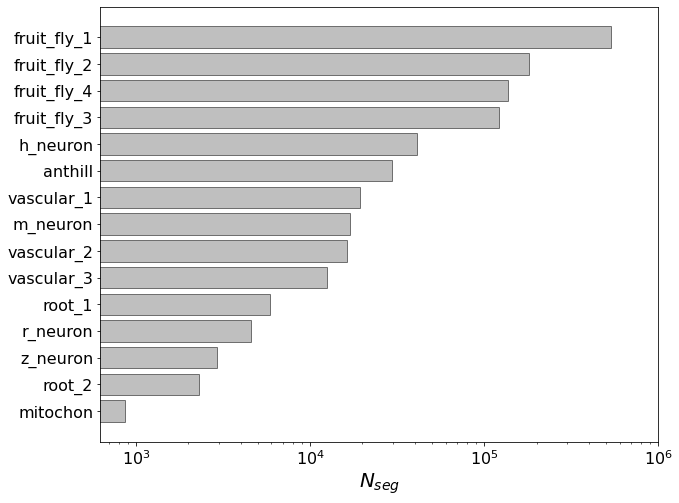

In [27]:
plt.figure(figsize=(10,8))
plt.barh(df_data['dataset'],df_data['number_of_segments'],alpha=0.5,edgecolor='black',orientation='horizontal',color='gray')
plt.xscale('log')
plt.xticks([1000,10000,100000,1000000])
plt.xlabel(r'$N_{seg}$')
#plt.yticks(rotation = 45);
plt.savefig('nr_segment_distribution.pdf', format='pdf',dpi=1200)

In [37]:
#plt.figure(figsize=(12,8))
all_densities_dict = {}
for name in name_list:
    #plt.figure(figsize=(12,8))
    #infile = open(name + ".all_densities.pkl",'rb')
    all_densities = all_results[name]['density_list']
    all_densities= np.where(np.isnan(all_densities), 0, all_densities)
    all_densities = np.array(all_densities)
    #all_densities  = all_densities[all_densities  != 0]
    all_densities_dict[name] = np.array(all_densities)
    #print(np.max( np.array(all_densities)))
    #plt.hist(all_densities,label=name,color=color_dict[name],bins=50)
    #plt.yscale('log')
    #plt.xlim(-0.05,1.05)
    #plt.ylim(0,1)
    #plt.yscale('log')
    #plt.legend()
    #plt.xlabel('Local density')
    #plt.ylabel('Count')
    #plt.savefig(name + "_densities.svg", format='svg')

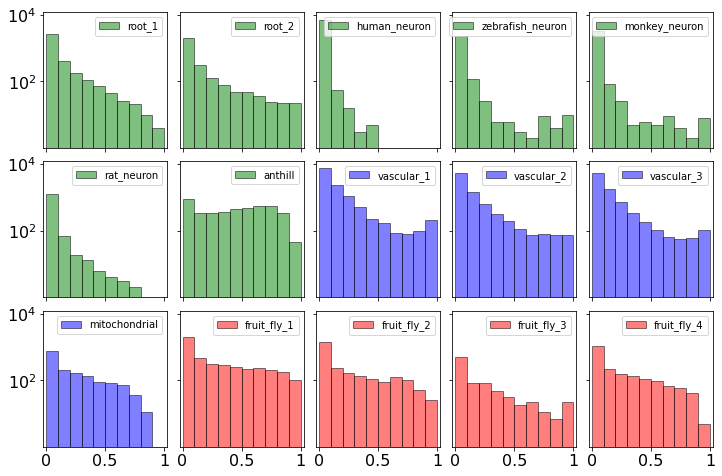

In [38]:
fig, axs = plt.subplots(3, 5, figsize=(12, 8),gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
#fig.suptitle('Local density distribution')
#['vascular_1','tree','mouse_brain','mitochondrial','anthill','root_1','root_2','fruit_fly_2','fruit_fly_3','human_brain']

ij_name_dict = {'root_1':(0,0),'root_2':(0,1),'anthill':(1,1),'zebrafish_neuron':(0,3) ,'monkey_neuron':(0,4)
                ,'rat_neuron':(1,0), 'human_neuron':(0,2),'vascular_1':(1,2),'vascular_2':(1,3),'vascular_3':(1,4)
                ,'mitochondrial':(2,0),'fruit_fly_1':(2,1),'fruit_fly_2':(2,2),'fruit_fly_3':(2,3),'fruit_fly_4':(2,4)}
for name in name_list:
    
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].hist(all_densities_dict[name],color = category_color_dict[name],label=name,alpha=0.5,bins = np.arange(0,1.1,0.1),edgecolor='black')
    #lt.xlabel('Link mean number of intersections')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yscale('log')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticks([0,0.5,1]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticklabels([0,0.5,1])
    
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yticks([100,10000]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xlim(-0.025,1.025)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_ylim(1,12000)
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].axvline(np.mean(all_densities_dict[name]),color='black',linestyle='dashed')#,label = 'mean')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].legend()
    
for ax in axs.flat:
    ax.label_outer()



plt.savefig('density_distribution.pdf', format='pdf',dpi=1200)

# Complementary straightness

In [12]:
#plt.figure(figsize=(12,8))
c_straightness_dict = {}
for name in name_list:
    #plt.figure(figsize=(12,8))
    #infile = open(name + ".c_straightness.pkl",'rb')
    #c_straightness = pickle.load(infile) 
    c_straightness = all_results[name]['c_straightness'].values()
    c_straightness_dict[name] =list(all_results[name]['c_straightness'].values())
    #plt.hist(c_straightness,label=name,density=True,color = color_dict[name])
    #plt.xlim(-0.05,1.05)
    #plt.yscale('log')
    ##plt.ylim(0,1)
    #plt.legend()
    #plt.xlabel('Complementary straightness')
    #plt.ylabel('Count')
    #plt.savefig(name +'_c_straightness.svg', format='svg')

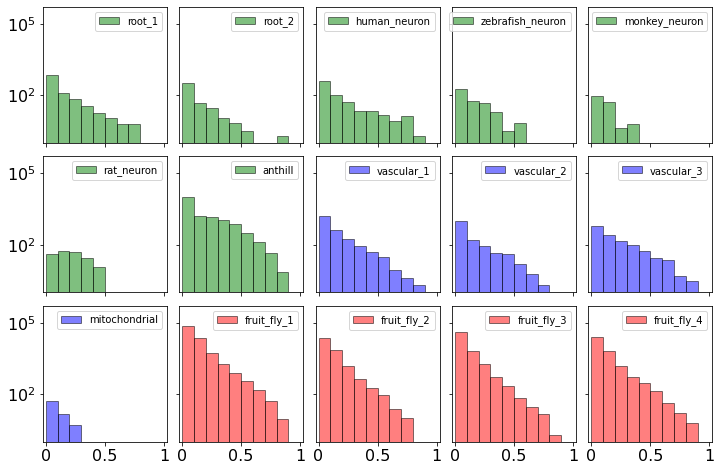

In [54]:
fig, axs = plt.subplots(3, 5, figsize=(12, 8),gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
#fig.suptitle('Local density distribution')
#['vascular_1','tree','mouse_brain','mitochondrial','anthill','root_1','root_2','fruit_fly_2','fruit_fly_3','human_brain']

ij_name_dict = {'root_1':(0,0),'root_2':(0,1),'anthill':(1,1),'zebrafish_neuron':(0,3) ,'monkey_neuron':(0,4)
                ,'rat_neuron':(1,0), 'human_neuron':(0,2),'vascular_1':(1,2),'vascular_2':(1,3),'vascular_3':(1,4)
                ,'mitochondrial':(2,0),'fruit_fly_1':(2,1),'fruit_fly_2':(2,2),'fruit_fly_3':(2,3),'fruit_fly_4':(2,4)}
for name in name_list:
    
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].hist(c_straightness_dict[name],color = category_color_dict[name],label=name,alpha=0.5,bins = np.arange(0,1.1,0.1),edgecolor='black')
    #lt.xlabel('Link mean number of intersections')
    labels = axs[ij_name_dict[name][0]][ij_name_dict[name][1]].get_xticklabels()
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticks([0,0.5,1]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticklabels([0,0.5,1])
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].xticks([0,1])
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yscale('log')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yticks([100,100000]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xlim(-0.025,1.025)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_ylim(1,500000)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].legend()
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].axvline(np.mean(c_straightness_dict[name]),color='black',linestyle='dashed')
for ax in axs.flat:
    ax.label_outer()

#plt.xlabel('Complementary straightness')
#plt.savefig(figure_save_path +'c_straightness.pdf', format='pdf',dpi=1200)
plt.savefig('c_straightness.pdf', format='pdf',dpi=1200)

# Fractal dimensions

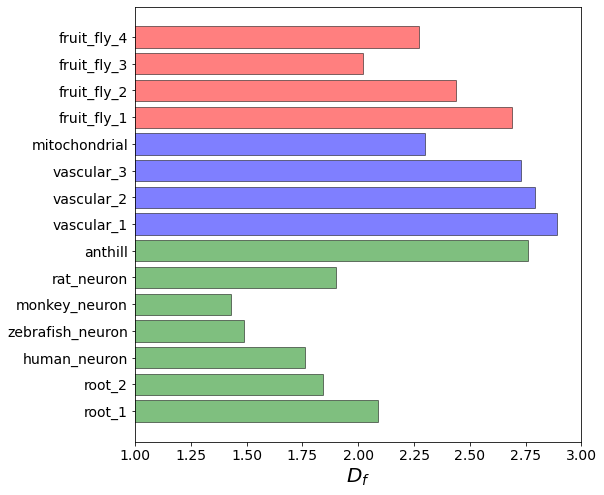

In [7]:
ordered_name_list =['root_1','root_2','human_neuron','zebrafish_neuron','monkey_neuron',
                'rat_neuron','anthill','vascular_1','vascular_2','vascular_3',
                'mitochondrial','fruit_fly_1','fruit_fly_2','fruit_fly_3','fruit_fly_4']
ordered_name_dict = {'tree':['root_1','root_2','human_neuron','zebrafish_neuron','monkey_neuron',
                'rat_neuron','anthill'],'lattice':['vascular_1','vascular_2','vascular_3',
                'mitochondrial'],'tree-network':['fruit_fly_1','fruit_fly_2','fruit_fly_3','fruit_fly_4']}
plt.figure(figsize=(8,8))
for name in ordered_name_list:
    if name in ordered_name_dict['tree']:
        plt.barh(name,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='green')
    if name in ordered_name_dict['lattice']:            
        plt.barh(name,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='blue')
    if name in ordered_name_dict['tree-network']:            
        plt.barh(name,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='red')
    plt.xlim(1,3)
    plt.xlabel('$D_{f}$')
    #plt.yticks(rotation = 45);
plt.savefig('fractal_dimension.pdf', format='pdf',dpi=1200)

In [ ]:
plt.figure(figsize=(8,8))
for name in df_dict['name']:
    print(name)
    df_row = df[df['name'] == name]
    
    x = df_row['network_diameter/log(N)']
    y = df_row['mean_normed_cycle_basis_length']
    plt.scatter(x, y)
    plt.text((x+0.005),(y + 0.005), name, fontsize=12)
    #if name == 'monkey_neuron':
    #    plt.text(x * 1 , y * (1 - 0.2), name, fontsize=12)
    #elif name == 'rat_neuron':
    #    plt.text(x * 1  , y * (1 + 0.2) , name, fontsize=12)
    #elif name == 'root_1':
    #    plt.text(x * 1  , y * (1 + 0.2) , name, fontsize=12)
    #elif name == 'root_2':
    #    plt.text(x * 1  , y * (1 + 0.2) , name, fontsize=12)
    #elif name == 'mitochondrial':
    #    plt.text(x * 1  , y * (1 + 0.1) , name, fontsize=12)
    #elif name == 'human_neuron':
    #    plt.text(x * 1  , y * (1 - 0.2) , name, fontsize=12)
    #elif name == 'zebrafish_neuron':
    #    plt.text(x * 1 , y *(1 + 0.2)  , name, fontsize=12)
    #elif name == 'anthill':
    #    plt.text(x * 1 , y * (1 + 0.2) , name, fontsize=12) 
    #elif name == 'fruit_fly_1':
    #    plt.text(x * (1 - 0.15) , y * (1 - 0.2) , name, fontsize=12) 
    #elif name == 'fruit_fly_2':
   #     plt.text(x * 1 , y * (1 - 0.35) , name, fontsize=12) 
    #
    #elif name == 'fruit_fly_3':
    #    plt.text(x * (1 - 0.01)  , y * (1 + 0.2), name, fontsize=12)     
    #    
    #elif name == 'fruit_fly_4':
    #    plt.text(x * 1 , y * (1 + 0.2) , name, fontsize=12)     
    #
    #else:
    #    plt.text(x * 1  , y * (1 + 0.02)  , name, fontsize=12)#if name == 'vascular_3':
        
l_x = []
l_y = []
t_x = []
t_y = []
cn_x = []
cn_y = []
for name in df_dict['name']:
    print(name)
    df_row = df[df['name'] == name]
    if ('vascular') in name or ('mito' in name):
        l_x.append(df_row['network_diameter/log(N)'])
        l_y.append(df_row['mean_normed_cycle_basis_length'])
    elif 'fruit_fly' in name:
        cn_x.append(df_row['network_diameter/log(N)'])
        cn_y.append(df_row['mean_normed_cycle_basis_length'])
    else:
        t_x.append(df_row['network_diameter/log(N)'])
        t_y.append(df_row['mean_normed_cycle_basis_length'])
plt.scatter(l_x,l_y,label='lattice',color='blue')
plt.scatter(t_x,t_y,label='tree',color='green')
plt.scatter(cn_x,cn_y,label='tree-network',color='red')
#plt.xscale('log')
plt.xlabel('network_diameter/log(N)')
plt.ylabel('Median NMCBL')
plt.legend()
plt.savefig('abstract_network_cycle_dia.pdf', format='pdf',dpi=1200)

In [48]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
import ast
import seaborn as sns
from scipy.stats import linregress
#sns.set_theme(style="whitegrid")
import math
from scipy.spatial import distance as dst
from scipy.spatial import ConvexHull

def create_line_point_list(start_point, end_point, density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            line_point_list.append([x, y, z])
def create_line_point_radii_list(start_point, end_point,radius_start,radius_end,density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            radius = (radius_end - radius_start) * t + radius_start
            line_point_list.append([x, y, z,radius])

    return line_point_list

def create_line_point_list(start_point, end_point, density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            line_point_list.append([x, y, z])

    return line_point_list


def create_thick_line_point_list(start_point,orientation_point,distance_between_circles,radius_1,radius_2):
    distance = np.sqrt((orientation_point[0]-start_point[0])**2 +(orientation_point[1]-start_point[1])**2 +(orientation_point[2]-start_point[2])**2)
    number_of_points =  np.max([int(distance/distance_between_circles),2])
    #number_of_points = density
    if radius_1 == 0 and radius_2 == 0:
        line_point_list = create_line_point_list(start_point,orientation_point,number_of_points)
        return line_point_list 
    else:
        line_point_list = create_line_point_list(start_point,orientation_point,number_of_points)
        thick_points_list = []
        k = np.array([orientation_point[0]-start_point[0], orientation_point[1]-start_point[1] ,orientation_point[2]-start_point[2] ],dtype = float )
        k /= np.linalg.norm(k)
        x = np.random.randn(3)  # take a random vector
        x -= x.dot(k) * k       # make it orthogonal to k
        x /= np.linalg.norm(x)  # normalize it
        y = np.cross(k, x)
        for i, center_point in enumerate(line_point_list):
                parameter = i/len(line_point_list)
                radius = (radius_2 - radius_1) * parameter + radius_1
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)

        if radius_1 > distance_between_circles:
            thick_points_list.append(start_point)
        if radius_2 > distance_between_circles:
            thick_points_list.append(orientation_point)

        if 2 * radius_1 > distance_between_circles:
            number_of_inner_circles = np.max([math.ceil( 2 * radius_1 / distance_between_circles),3])
            inner_radius_list = [radius_1 * parameter for parameter in np.linspace(0,1, number_of_inner_circles)[1:-1]]

            for inner_radius in inner_radius_list:
                center_point = start_point
                radius = inner_radius
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)
        if 2 * radius_2 > distance_between_circles:
            number_of_inner_circles = np.max([math.ceil( 2 * radius_2 / distance_between_circles),3])
            inner_radius_list = [radius_2 * parameter for parameter in np.linspace(0,1, number_of_inner_circles)[1:-1]]
            for inner_radius in inner_radius_list:
                center_point = orientation_point
                radius = inner_radius
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)

        return thick_points_list + line_point_list 
    
def bounding_box_from_merged_skeleton(merged_skeleton_dataset):
    x_min = np.min([np.min(merged_skeleton_dataset['x_1']),np.min(merged_skeleton_dataset['x_2'])])
    x_max = np.max([np.max(merged_skeleton_dataset['x_1']),np.max(merged_skeleton_dataset['x_2'])])

    y_min = np.min([np.min(merged_skeleton_dataset['y_1']),np.min(merged_skeleton_dataset['y_2'])])
    y_max = np.max([np.max(merged_skeleton_dataset['y_1']),np.max(merged_skeleton_dataset['y_2'])])

    z_min = np.min([np.min(merged_skeleton_dataset['z_1']),np.min(merged_skeleton_dataset['z_2'])])
    z_max = np.max([np.max(merged_skeleton_dataset['z_1']),np.max(merged_skeleton_dataset['z_2'])])

    return [x_min,x_max,y_min,y_max,z_min,z_max]

name_list = [ 'vascular_2','vascular_3','vascular_1','human_neuron','rat_neuron','zebrafish_neuron','mitochondrial','anthill','root_1','root_2','monkey_neuron','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4']
#name_list = ['human_neuron','rat_neuron',
#            'monkey_neuron','zebrafish_neuron',
#    'vascular_2','vascular_3','vascular_1','mitochondrial','anthill','root_1','root_2',
#name_list = ['fruit_fly_1','fruit_fly_4']
final_results ={}
path = '../1. data/3. final_data/'
for name in name_list:
    print('**** Network:',name)
    print('Starting computation')
    #path = '../1. data/3. final_data/'

    infile = open('1. results_basic_properties/' + name +'_basic_results.pkl','rb')
    final_results[name] = pickle.load(infile)

    print('Computing complementary straightness')
    skeleton_paths = pd.read_csv(path +  name+ '.paths.csv',index_col=[0])
    skeleton_paths.drop_duplicates(inplace=True)
    skeleton_paths['distance'] = np.sqrt((skeleton_paths['x_2']-  skeleton_paths['x_1'])**2 +  
                                               (skeleton_paths['y_2']-  skeleton_paths['y_1'])**2 +
                                               (skeleton_paths['z_2']-  skeleton_paths['z_1'])**2 )
    skeleton_paths['volume'] = 1/3 * np.pi * (skeleton_paths['radius_1']**2 + skeleton_paths['radius_2']**2 +    skeleton_paths['radius_1']*skeleton_paths['radius_2'])*skeleton_paths['distance']
    segments_path_id = skeleton_paths[['bodyId_pre','bodyId_post','path_id']].copy()
    segments_path_id.drop_duplicates(inplace=True) 
    
    connectome = segments_path_id
    connectome_list = connectome.values.tolist()
    connectome_loc = []
    for i,pair in enumerate(connectome_list):
        #print(i,pair)
        start_row = skeleton_paths[(skeleton_paths['pt_id_1'] == pair[0] ) & (skeleton_paths['path_id'] == pair[2] )]
        if len(start_row) == 0:
            start_row = skeleton_paths[(skeleton_paths['pt_id_2'] == pair[0] ) & (skeleton_paths['path_id'] == pair[2] )]
            start_loc = [start_row['x_2'].values[0],start_row['y_2'].values[0],start_row['z_2'].values[0]]
        else:
            start_loc = [start_row['x_1'].values[0],start_row['y_1'].values[0],start_row['z_1'].values[0]]

        end_row = skeleton_paths[(skeleton_paths['pt_id_2'] == pair[1] )& (skeleton_paths['path_id'] == pair[2] )]
        if len(end_row) == 0:
            end_row = skeleton_paths[(skeleton_paths['pt_id_1'] == pair[1] )& (skeleton_paths['path_id'] == pair[2] )]
            end_loc = [end_row['x_1'].values[0],end_row['y_1'].values[0],end_row['z_1'].values[0]]
        else:
            end_loc = [end_row['x_2'].values[0],end_row['y_2'].values[0],end_row['z_2'].values[0]]
        pair.append(start_loc)
        pair.append(end_loc)
        connectome_loc.append(pair)
        
    euclidean_path_length_list = []
    total_path_length_list = []
    contraction_list = []
    count = 0
    contraction_pairs = {}
    volume_pairs = {}
    link_path_length_dict = {}
    nr_segments_per_link_dict = {}
    for index,pair in enumerate(connectome_loc):
        #print(count)
        #print(pair)
        bodyid_pre = pair[0]
        bodyid_post = pair[1]
        skeleton_df = skeleton_paths[skeleton_paths['path_id'] == pair[2]].copy()
        #print(len(skeleton_df))
        nr_segments_per_link = len(skeleton_df)
        point_list = skeleton_df[['x_1','y_1','z_1']].values.tolist()
        radius_list = skeleton_df[['radius_1']].values.tolist()
        distance_list = []
        volume_list =  []
        for i,row in skeleton_df.iterrows():
            point_start =  row[['x_1','y_1','z_1']].values.tolist()
            point_end =  row[['x_2','y_2','z_2']].values.tolist()
            radius_start =  row[['radius_1']].values.tolist()[0]
            radius_end = row[['radius_2']].values.tolist()[0]
            distance = np.sqrt((point_end[0] - point_start[0])**2 + (point_end[1] - point_start[1])**2 + (point_end[2] - point_start[2])**2 )
            distance_list.append(distance)
            volume = 1/3 * np.pi * distance * ( radius_start**2 + radius_end**2 + radius_start*radius_end)
            volume_list.append(volume)
        total_path_length = np.sum(distance_list)
        total_volume = np.sum(volume_list)
        if total_path_length > 0:
            total_path_length_list.append(total_path_length)

            # Sometimes, there is a switch between x1 and x2 in starting location, but path length is calculated starting from x1 always check
            # This means that paths are not sorted perfectly, in a sense that bodyidpre is first row x_1,y_1,z_1, as it might be x_2,y_2,z_2
            node_source = pair[3]
            node_target = pair[4]
            #print(node_source,node_target)

            euclidean_distance = np.sqrt((node_source[0]-node_target[0])**2 +(node_source[1]-node_target[1])**2 + (node_source[2]-node_target[2])**2) 
            euclidean_path_length_list.append(euclidean_distance)
            contraction = euclidean_distance/total_path_length
            contraction_list.append(contraction )
            contraction_pairs[pair[2]] = 1 - contraction
            volume_pairs[pair[2]] = total_volume
            link_path_length_dict[pair[2]] = total_path_length
            nr_segments_per_link_dict[pair[2]] = nr_segments_per_link
            #if contraction > 1:
            #    break
        count +=1 
    total_volume_of_the_network = np.sum(list(volume_pairs.values()))
    final_results[name]['link_volume_normed'] = {}
    for link_volume_pair in volume_pairs.keys():
        final_results[name]['link_volume_normed'][link_volume_pair] = final_results[name]['link_volume'][link_volume_pair]/total_volume_of_the_network
    final_results[name]['c_straightness'] = contraction_pairs
    final_results[name]['link_volume'] = volume_pairs
    final_results[name]['link_segments'] = nr_segments_per_link_dict
    final_results[name]['link_path_length'] = link_path_length_dict
    with open("1. results_basic_properties_new/"+name + "_basic_results.pkl", "wb") as h:
               pickle.dump(final_results[name], h)

**** Network: vascular_2
Starting computation
Computing complementary straightness
**** Network: vascular_3
Starting computation
Computing complementary straightness
**** Network: vascular_1
Starting computation
Computing complementary straightness
**** Network: human_neuron
Starting computation
Computing complementary straightness
**** Network: rat_neuron
Starting computation
Computing complementary straightness
**** Network: zebrafish_neuron
Starting computation
Computing complementary straightness
**** Network: mitochondrial
Starting computation
Computing complementary straightness
**** Network: anthill
Starting computation
Computing complementary straightness
**** Network: root_1
Starting computation
Computing complementary straightness
**** Network: root_2
Starting computation
Computing complementary straightness
**** Network: monkey_neuron
Starting computation
Computing complementary straightness
**** Network: fruit_fly_2
Starting computation
Computing complementary straightness


In [23]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
import ast
import seaborn as sns
from scipy.stats import linregress
#sns.set_theme(style="whitegrid")
import math
from scipy.spatial import distance as dst
from scipy.spatial import ConvexHull

def create_line_point_list(start_point, end_point, density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            line_point_list.append([x, y, z])
def create_line_point_radii_list(start_point, end_point,radius_start,radius_end,density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            radius = (radius_end - radius_start) * t + radius_start
            line_point_list.append([x, y, z,radius])

    return line_point_list

def create_line_point_list(start_point, end_point, density):

    parameter_list = np.linspace(0,1,density)
    line_point_list = []

    for t in parameter_list:
            x = (end_point[0] - start_point[0]) * t + start_point[0]
            y = (end_point[1] - start_point[1]) * t + start_point[1]
            z = (end_point[2] - start_point[2]) * t + start_point[2]
            line_point_list.append([x, y, z])

    return line_point_list


def create_thick_line_point_list(start_point,orientation_point,distance_between_circles,radius_1,radius_2):
    distance = np.sqrt((orientation_point[0]-start_point[0])**2 +(orientation_point[1]-start_point[1])**2 +(orientation_point[2]-start_point[2])**2)
    number_of_points =  np.max([int(distance/distance_between_circles),2])
    #number_of_points = density
    if radius_1 == 0 and radius_2 == 0:
        line_point_list = create_line_point_list(start_point,orientation_point,number_of_points)
        return line_point_list 
    else:
        line_point_list = create_line_point_list(start_point,orientation_point,number_of_points)
        thick_points_list = []
        k = np.array([orientation_point[0]-start_point[0], orientation_point[1]-start_point[1] ,orientation_point[2]-start_point[2] ],dtype = float )
        k /= np.linalg.norm(k)
        x = np.random.randn(3)  # take a random vector
        x -= x.dot(k) * k       # make it orthogonal to k
        x /= np.linalg.norm(x)  # normalize it
        y = np.cross(k, x)
        for i, center_point in enumerate(line_point_list):
                parameter = i/len(line_point_list)
                radius = (radius_2 - radius_1) * parameter + radius_1
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)

        if radius_1 > distance_between_circles:
            thick_points_list.append(start_point)
        if radius_2 > distance_between_circles:
            thick_points_list.append(orientation_point)

        if 2 * radius_1 > distance_between_circles:
            number_of_inner_circles = np.max([math.ceil( 2 * radius_1 / distance_between_circles),3])
            inner_radius_list = [radius_1 * parameter for parameter in np.linspace(0,1, number_of_inner_circles)[1:-1]]

            for inner_radius in inner_radius_list:
                center_point = start_point
                radius = inner_radius
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)
        if 2 * radius_2 > distance_between_circles:
            number_of_inner_circles = np.max([math.ceil( 2 * radius_2 / distance_between_circles),3])
            inner_radius_list = [radius_2 * parameter for parameter in np.linspace(0,1, number_of_inner_circles)[1:-1]]
            for inner_radius in inner_radius_list:
                center_point = orientation_point
                radius = inner_radius
                n_vertices =  np.max([math.ceil(2 * radius * np.pi/ distance_between_circles),3])
                circle_point_list = []
                for j in range(0,n_vertices):
                    angle = (j / n_vertices) * 2 * np.pi

                    circle_x = center_point[0] + radius * np.cos(angle)*x[0] +  radius * np.sin(angle)*y[0]#* np.cos(incline_angle)
                    circle_y = center_point[1] + radius * np.cos(angle)*x[1] +  radius * np.sin(angle)*y[1]
                    circle_z = center_point[2] + radius * np.cos(angle)*x[2] +  radius * np.sin(angle)*y[2]

                    v = [circle_x,circle_y, circle_z]
                    #circle_point_list.append(v)
                    thick_points_list.append(v)

        return thick_points_list + line_point_list 
    
def bounding_box_from_merged_skeleton(merged_skeleton_dataset):
    x_min = np.min([np.min(merged_skeleton_dataset['x_1']),np.min(merged_skeleton_dataset['x_2'])])
    x_max = np.max([np.max(merged_skeleton_dataset['x_1']),np.max(merged_skeleton_dataset['x_2'])])

    y_min = np.min([np.min(merged_skeleton_dataset['y_1']),np.min(merged_skeleton_dataset['y_2'])])
    y_max = np.max([np.max(merged_skeleton_dataset['y_1']),np.max(merged_skeleton_dataset['y_2'])])

    z_min = np.min([np.min(merged_skeleton_dataset['z_1']),np.min(merged_skeleton_dataset['z_2'])])
    z_max = np.max([np.max(merged_skeleton_dataset['z_1']),np.max(merged_skeleton_dataset['z_2'])])

    return [x_min,x_max,y_min,y_max,z_min,z_max]

#name_list = [ 'vascular_2','vascular_3','vascular_1','human_neuron','rat_neuron','zebrafish_neuron','mitochondrial','anthill','root_1','root_2','monkey_neuron','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4']
#name_list = ['human_neuron','rat_neuron',
#            'monkey_neuron','zebrafish_neuron',
#    'vascular_2','vascular_3','vascular_1','mitochondrial','anthill','root_1','root_2',
name_list = ['zebrafish_neuron']
final_results ={}
for name in name_list:
    print('**** Network:',name)
    print('Starting computation')
    final_results[name] = {}
    path = '../1. data/3. final_data/'
    skeleton_paths = pd.read_csv(path +  name+ '.paths.csv',index_col=[0])
    skeleton_paths.drop_duplicates(inplace=True)
    
    bounds = bounding_box_from_merged_skeleton(skeleton_paths)
    bounding_box_volume = abs(bounds[0] - bounds[1]) * abs(bounds[2] - bounds[3]) * abs(bounds[4] - bounds[5])
    longest_side = np.max([abs(bounds[0] - bounds[1]),abs(bounds[2] - bounds[3]),abs(bounds[4] - bounds[5])])
    shortest_side = np.min([abs(bounds[0] - bounds[1]),abs(bounds[2] - bounds[3]),abs(bounds[4] - bounds[5])])
    skeleton_paths['distance'] = np.sqrt((skeleton_paths['x_2']-  skeleton_paths['x_1'])**2 +  
                                               (skeleton_paths['y_2']-  skeleton_paths['y_1'])**2 +
                                               (skeleton_paths['z_2']-  skeleton_paths['z_1'])**2 )
    skeleton_paths['volume'] = 1/3 * np.pi * (skeleton_paths['radius_1']**2 + skeleton_paths['radius_2']**2 +    skeleton_paths['radius_1']*skeleton_paths['radius_2'])*skeleton_paths['distance']
    skeleton_paths_original = skeleton_paths.copy()
    final_results[name]['mean_segment_length'] = np.mean(skeleton_paths['distance'])
    final_results[name]['segment_length_list'] = skeleton_paths['distance'].values
    final_results[name]['mean_radius_length'] = np.mean(skeleton_paths['radius_1'])
    final_results[name]['radius_list'] = skeleton_paths['radius_1'].values
    final_results[name]['mean_segment_over_bounding_box_average_length'] = np.mean(skeleton_paths['distance'])/(np.mean([abs(bounds[0] - bounds[1]),
                                                                                                                          abs(bounds[2] - bounds[3]),
                                                                                                                          abs(bounds[4] - bounds[5])]))
    cube_side =  shortest_side *0.32
    cube_side_list = [proportion/100 * cube_side for proportion in np.arange(15,105,5)]
    segment_resolution = np.min([skeleton_paths['distance'].mean(),skeleton_paths['radius_1'].mean(),skeleton_paths['radius_2'].mean()])/2
    final_results[name]['cube_side'] = cube_side
    final_results[name]['cube_side_list'] = cube_side_list
    final_results[name]['segment_resolution_distance'] = segment_resolution
    

    
    print('Skeleton multiplication')
    multiplied_skeleton_part_merged = []
    for row in skeleton_paths[['pt_id_1','x_1','y_1','z_1','radius_1','pt_id_2','x_2','y_2','z_2','radius_2']].values:
        start_point = row[1:4]
        radius_start = row[4]
        end_point = row[6:9]
        radius_end = row[9]
        point_to_point_dist = dst.euclidean(start_point,end_point)
        ratio = (point_to_point_dist+radius_start+radius_end)/ (cube_side)
        if ratio > 0.2:
            multiplication_factor = 2 + 5
           # print('Multiplying skeleton',multiplying_factor )
            new_points = create_line_point_radii_list(start_point, end_point, radius_start,radius_end,multiplication_factor)
            for i in range(0,multiplication_factor-1):
                multiplied_skeleton_part_merged += [list(new_points[i])+list(new_points[i+1])]
        else:
            new_row = [list(start_point) + [radius_start] + list(end_point) + [radius_end]]
            multiplied_skeleton_part_merged += new_row 

    multiplied_skeleton = pd.DataFrame(multiplied_skeleton_part_merged,columns=['x_1','y_1','z_1','radius_1','x_2','y_2','z_2','radius_2'])
    skeleton_paths = multiplied_skeleton.copy()
    print('Skeleton multiplication complete')
    
    point_cloud_list = []
    for i,row in enumerate(skeleton_paths[['x_1','y_1','z_1','radius_1','x_2','y_2','z_2','radius_2']].values):
        print('**** Network:',name)
        print( 'Computing fractal dimension',i,len(skeleton_paths))
        start_point = row[0:3]
        radius_start = row[3]
        end_point = row[4:7]
        radius_end = row[7]
        point_cloud_list += create_thick_line_point_list(start_point,end_point,segment_resolution, radius_start,radius_end)
    point_cloud_skeleton_paths  = pd.DataFrame(point_cloud_list,columns=['x','y','z'])
    #sample_fraction = 1
    #point_cloud_skeleton_paths = point_cloud_skeleton_paths.sample(frac=sample_fraction)
    
    link_paths = pd.read_csv(path +  name+ '.paths.csv',index_col=[0])
    link_paths = link_paths[['x_1','y_1','z_1','x_2','y_2','z_2','path_id']].copy()
    filled_boxes_count_list = []
    all_densities = []
    all_link_densities = []
    number_of_segments_used_list = []
    for cube_side in cube_side_list:
        print('**** Network:',name,'Cube side',cube_side,'out of',cube_side_list)
        print('Cube side ratio:',cube_side/longest_side)
        x_axis = np.arange(bounds[0],bounds[1],cube_side)
        y_axis = np.arange(bounds[2],bounds[3],cube_side)
        z_axis = np.arange(bounds[4],bounds[5],cube_side)
        number_of_segments_used = 0
        filled_boxes_count = 0
        empty_boxes_count = 0
        box_count = 0
        cube_dict = {}
        for i in range(len(x_axis)-1):
                print(i,len(x_axis))
                box_count += 1
                for j in range(len(y_axis)-1):
                            for k in range(len(z_axis)-1):
                                points_inside = point_cloud_skeleton_paths[(point_cloud_skeleton_paths['x'] > x_axis[i]) & 
                                                            (point_cloud_skeleton_paths['x'] < x_axis[i+1]) &
                                                            (point_cloud_skeleton_paths['y'] > y_axis[j]) &
                                                            (point_cloud_skeleton_paths['y'] < y_axis[j+1]) &
                                                            (point_cloud_skeleton_paths['z'] > z_axis[k]) &
                                                            (point_cloud_skeleton_paths['z'] < z_axis[k+1])]
                                links_inside  = link_paths[(link_paths['x_1'] > x_axis[i]) & 
                                                            (link_paths['x_1'] < x_axis[i+1]) &
                                                            (link_paths['y_1'] > y_axis[j]) &
                                                            (link_paths['y_1'] < y_axis[j+1]) &
                                                            (link_paths['z_1'] > z_axis[k]) &
                                                            (link_paths['z_2'] < z_axis[k+1])]
                                if len(link_inside) == 0:
                                    all_link_densities.append(0)
                                else:
                                    all_link_densities.append(len(set(links_inside['path_id'].values)))
                                if len(points_inside) == 0:
                                    empty_boxes_count += 1
                                else:
                                    filled_boxes_count += 1
                                    if cube_side == cube_side_list[0] and len(points_inside)>=4:
                                        convex_hull = ConvexHull(points_inside.values,qhull_options="QJ")
                                        local_density = (convex_hull.volume)/cube_side**3
                                        all_densities.append(local_density)
                                        if local_density > 1 :
                                            print("Density larger than 1")
                                            break
        filled_boxes_count_list.append(filled_boxes_count)
    fractal_dimension =  -linregress(np.log(cube_side_list),np.log(filled_boxes_count_list))[0]
    final_results[name]['filled_boxes_count_list'] = filled_boxes_count_list
    final_results[name]['fractal_dimension'] = np.round(fractal_dimension,3)
    final_results[name]['density_list'] = all_densities
    final_results[name]['density_max'] = np.max(all_densities)
    final_results[name]['link_density_list'] =all_link_densities
    #with open("1. results_fractal_density/"+name + "_basic_results.pkl", "wb") as h:
    #       pickle.dump(final_results[name], h)    


**** Network: zebrafish_neuron
Starting computation
Skeleton multiplication
Skeleton multiplication complete
**** Network: zebrafish_neuron
Computing fractal dimension 0 4279
**** Network: zebrafish_neuron
Computing fractal dimension 1 4279
**** Network: zebrafish_neuron
Computing fractal dimension 2 4279
**** Network: zebrafish_neuron
Computing fractal dimension 3 4279
**** Network: zebrafish_neuron
Computing fractal dimension 4 4279
**** Network: zebrafish_neuron
Computing fractal dimension 5 4279
**** Network: zebrafish_neuron
Computing fractal dimension 6 4279
**** Network: zebrafish_neuron
Computing fractal dimension 7 4279
**** Network: zebrafish_neuron
Computing fractal dimension 8 4279
**** Network: zebrafish_neuron
Computing fractal dimension 9 4279
**** Network: zebrafish_neuron
Computing fractal dimension 10 4279
**** Network: zebrafish_neuron
Computing fractal dimension 11 4279
**** Network: zebrafish_neuron
Computing fractal dimension 12 4279
**** Network: zebrafish_neuron

KeyboardInterrupt: 